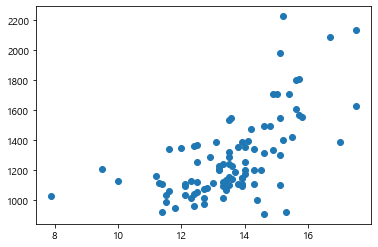

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


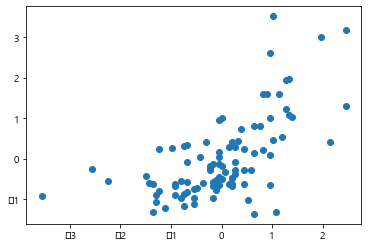

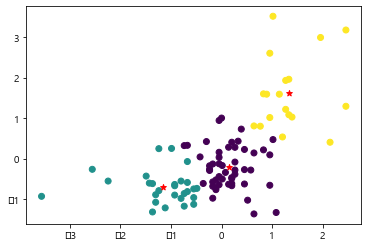

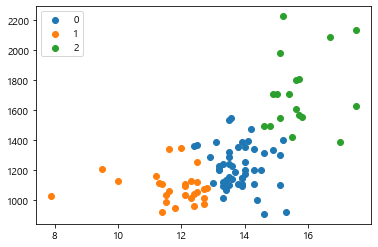

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.rc('font', family='Malgun Gothic')

df = pd.read_csv('./Data/전국_기온군집.csv')

# df.info()
df = df.fillna(df.mean())

plt.figure()
plt.scatter(df['평균기온'], df['합계 강수량'])

scaler = StandardScaler()
scaled = scaler.fit_transform(df[['평균기온', '합계 강수량']])
df_c = pd.DataFrame(data=scaled, columns=['평균기온', '합계 강수량'])

plt.figure()
plt.scatter(df_c['평균기온'], df_c['합계 강수량'])

model = KMeans(n_clusters=3)
model.fit(df_c)
center = model.cluster_centers_
df_c['cluster'] = model.labels_

plt.figure()
plt.scatter(df_c['평균기온'], df_c['합계 강수량'], c=df_c['cluster'])
plt.scatter(center[:,0], center[:,1], c='r', marker='*', label='center')

df['cluster'] = df_c['cluster']

plt.figure()
for i in range(0, 3):
    plt.scatter(df[df['cluster'] == i]['평균기온'], df[df['cluster'] == i]['합계 강수량'], label=i)
plt.legend()

# df[df['cluster'] == 0]['지점명']

In [3]:
# df[df['cluster'] == 0]['지점명']

from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_score(df_c, df_c['cluster'])

0.5523016040177